<a href="https://colab.research.google.com/github/csrsandeep/Data-science-projects/blob/main/MLP_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prerequisite Python Modules


In [ ]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

## Loading Training Data

The MNIST dataset is conveniently bundled within Keras


In [ ]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(Images_train, Labels_train), (Images_test, Labels_test) = mnist.load_data()

print("Images_train shape", Images_train.shape)
print("Labels_train shape", Labels_train.shape)
print("Images_test shape", Images_test.shape)
print("Labels_test shape", Labels_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
Images_train shape (60000, 28, 28)
Labels_train shape (60000,)
Images_test shape (10000, 28, 28)
Labels_test shape (10000,)


Using matplotlib, we can plot some sample images from the training set
.

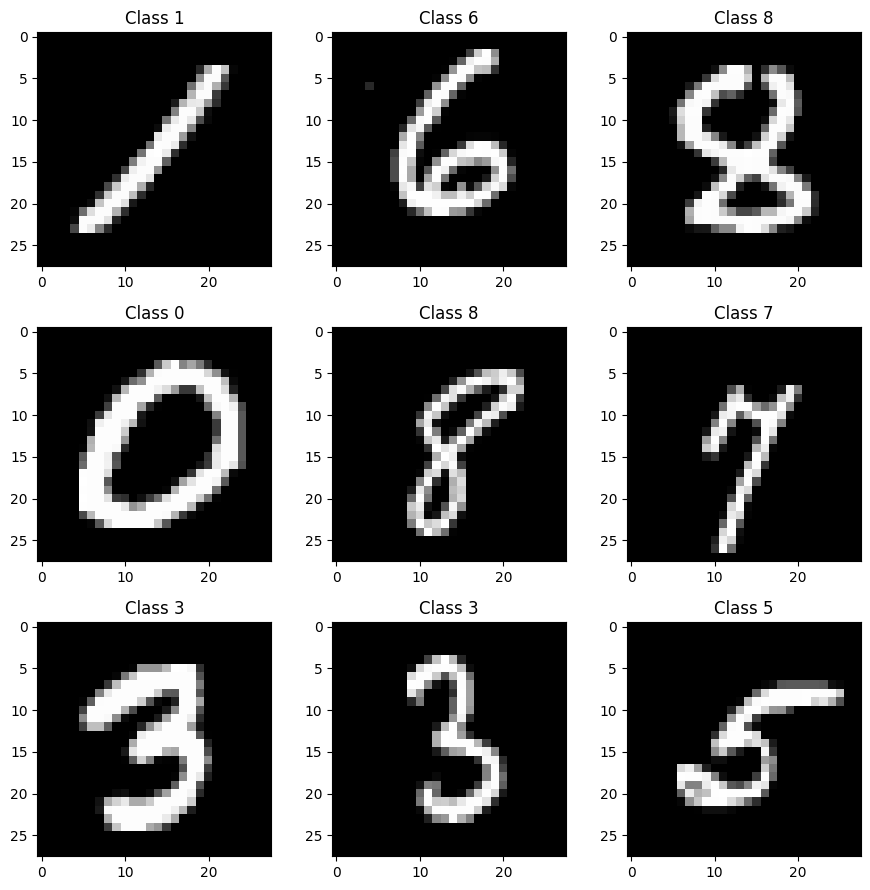

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(Images_train))
    plt.imshow(Images_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(Labels_train[num]))

plt.tight_layout()

## Formatting the input data layer

In [ ]:
Images_train = Images_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
Images_test = Images_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

Images_train = Images_train.astype('float32')   # change integers to 32-bit floating point numbers
Images_test = Images_test.astype('float32')

Images_train /= 255                        # normalize each value for each pixel for the entire vector for each input
Images_test /= 255

print("Training matrix shape", Images_train.shape)
print("Testing matrix shape", Images_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


We then modify our classes (unique digits) to be in the one-hot format


In [ ]:
nb_classes = 10 # number of unique digits

Labels_train = np_utils.to_categorical(Labels_train, nb_classes)
Labels_test = np_utils.to_categorical(Labels_test, nb_classes)

In [ ]:
print(Labels_train.shape)
print(Labels_train[25,:])
#Labels_test.shape

(60000, 10)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


# Building a MLP



In [ ]:
# The Sequential model is a linear stack of layers and is very common.

model = Sequential()

## The first hidden layer

In [ ]:
# The first hidden layer is a set of 250 nodes (artificial neurons).
# Each node will receive an element from each input vector and apply some weight and bias to it.

model.add(Dense(250, input_shape=(784,))) #(784,) is not a typo -- that represents a 784 length vector!

In [ ]:
# An "activation" is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that artifical neuron has fired.
# The Rectified Linear Unit (ReLU) converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged.

model.add(Activation('relu'))

## Adding the second hidden layer

In [ ]:
# The second hidden layer  is a set of 100 nodes.
# they receive 250 inputs from the output of the first 250-node layer.

model.add(Dense(100))
model.add(Activation('relu'))


## The Final Output Layer

In [ ]:
# The final layer of 10 neurons is fully-connected to the previous 100-node layer.
# The final layer of a FCN should be equal to the number of desired classes (10 in this case).
model.add(Dense(10))

In [ ]:
# The "softmax" activation represents a probability distribution over K different possible outcomes.
# Its values are all non-negative and sum to 1.

model.add(Activation('softmax'))

In [ ]:
# Summarize the built model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               196250    
                                                                 
 activation (Activation)     (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               25100     
                                                                 
 activation_1 (Activation)   (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 222,360
Trainable params: 222,360
Non-trai

Compiling the Model

In [ ]:
from tensorflow.keras.optimizers import SGD

# Create the GD optimizer
gd_optimizer = SGD(learning_rate=0.01)

# Compile your model and specify the GD optimizer

model.compile(loss='categorical_crossentropy', optimizer=gd_optimizer, metrics=['accuracy'])


## Train the model

In [ ]:
model.fit(Images_train, Labels_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 1.2020 - accuracy: 0.6947
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.4782 - accuracy: 0.8752
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3745 - accuracy: 0.8966
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3301 - accuracy: 0.9070
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3023 - accuracy: 0.9148


## Evaluate Model's Accuracy on Test Data

In [ ]:
score = model.evaluate(Images_test, Labels_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

135/313 [===========>..................] - ETA: 0s - loss: 0.3565 - accuracy: 0.8981